In [4]:
import numpy as np
import pandas as pd
test= pd.read_csv("q_dataset/ds_test.csv",index_col=0)
train= pd.read_csv("q_dataset/ds_train.csv",index_col=0)
whole= pd.read_csv("q_dataset/ds_whole.csv",index_col=0)
features=whole.drop(columns=['glaucoma'])
target=whole.glaucoma
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
features_= transfer.fit_transform(features)
whole_=transfer.fit_transform(whole)

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca=PCA()

In [7]:
features_reduced = pca.fit_transform(features_)

In [8]:
whole__=pca.fit_transform(whole_)

In [9]:
features.shape

(499, 7)

In [10]:
pca_2 = PCA(n_components=2)

In [11]:
features_2 = pca_2.fit_transform(features_)

In [12]:
features_2.shape

(499, 2)

In [13]:
whole_2=pca_2.fit_transform(whole_)


In [14]:
pca_95 = PCA(n_components=0.95)

In [15]:
features_95 = pca_95.fit_transform(features_)

In [16]:
features_95.shape

(499, 6)

In [17]:
pca.explained_variance_ratio_   #每个成分对原始数据的解释性

array([0.49240302, 0.12476123, 0.11377113, 0.09856893, 0.06158988,
       0.04279499, 0.038608  , 0.02750282])

In [18]:
cumsum = np.cumsum(pca.explained_variance_ratio_)   #每个成分对原始数据的解释性的累加和

In [19]:
cumsum

array([0.49240302, 0.61716424, 0.73093538, 0.82950431, 0.89109419,
       0.93388918, 0.97249718, 1.        ])

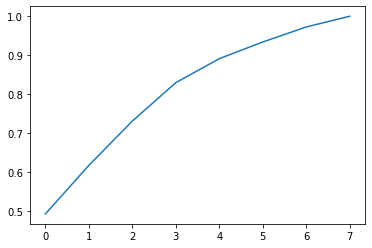

In [20]:
import matplotlib.pyplot as plt
plt.plot(cumsum)
plt.show()

In [21]:
pca_2.explained_variance_ratio_

array([0.49240302, 0.12476123])

In [22]:
features_2

array([[-1.86898500e+00, -5.62574917e-01],
       [-2.01387159e+00, -7.30662103e-01],
       [-1.69009553e+00,  1.31410410e+00],
       [-4.54030393e-01,  1.18668554e+00],
       [ 1.12233885e-01, -2.06998342e-01],
       [ 1.51931906e+00,  3.10626000e-01],
       [ 4.27386977e-01, -2.02946293e-01],
       [ 1.52854944e+00,  2.80878043e-01],
       [ 3.65773933e-01, -2.12431055e-01],
       [ 1.66273699e+00,  3.06874772e-01],
       [ 6.86656919e-02,  1.11352054e+00],
       [ 2.49890512e+00,  7.26264372e-01],
       [-2.33670780e+00, -9.14384882e-01],
       [ 1.83300499e+00, -1.13418518e+00],
       [ 2.97750593e+00,  1.61043809e+00],
       [ 2.31135519e+00,  7.80963924e-01],
       [ 3.36290625e+00,  1.61012288e+00],
       [-5.32618154e-01,  7.76649025e-01],
       [-1.73098531e+00,  2.03125805e+00],
       [ 2.53277441e+00,  2.24066760e+00],
       [-2.02798693e+00,  1.99993726e+00],
       [ 2.62479996e+00,  2.32070340e+00],
       [-2.12021820e+00, -1.48439914e+00],
       [ 9.

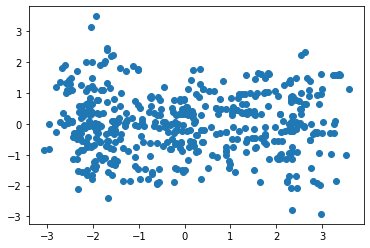

In [23]:
x1=features_2[:,0]
y1=features_2[:,1]
plt.scatter(x1,y1)
plt.show()

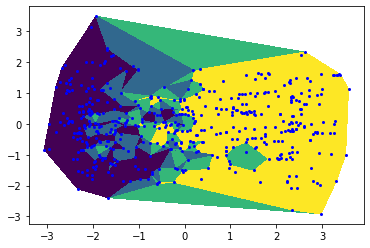

In [24]:
x=features_2[:,0]
y=features_2[:,1]
z = whole.glaucoma
# plot:
fig, ax = plt.subplots()
ax.plot(x, y,'o', markersize=2, color='blue')
ax.tripcolor(x, y, z)
plt.show()

In [25]:
whole

,glaucoma,age,ocular_pressure,MD,PSD,GHT,cornea_thickness,RNFL4.mean
RL,,,,,,,,
OD,0,62,17,-0.54,1.81,0,558,103.333333
OS,0,62,17,-0.64,1.38,0,564,107.666667
OD,0,66,12,-1.65,2.89,2,490,162.000000
OS,0,66,12,-1.14,3.88,2,495,99.000000
OD,1,53,24,-2.90,3.78,2,547,74.666667
...,...,...,...,...,...,...,...,...
OS,0,13,15,-2.44,2.49,0,531,109.666667
OD,0,55,15,-1.21,2.17,0,562,109.333333
OS,0,55,16,-0.84,1.86,0,566,110.333333


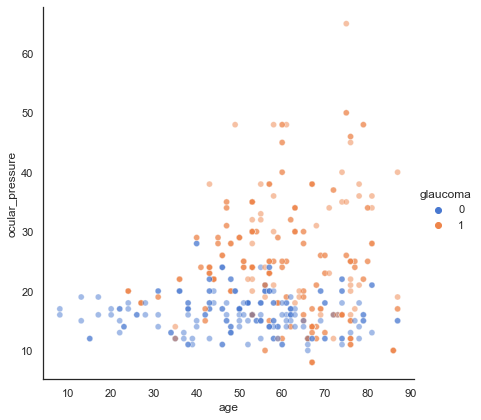

In [26]:
import seaborn as sns
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="age", y="ocular_pressure", hue="glaucoma",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=whole)

plt.show()           #未降维未归一化的全部数据

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


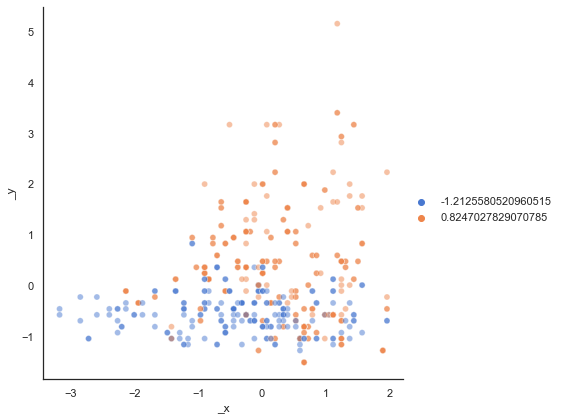

In [27]:
import seaborn as sns
sns.set_theme(style="white")
x=whole_[:,1]
y=whole_[:,2]
hue=whole_[:,0]
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x, y,hue,
            sizes=(40, 400), alpha=.5,  palette="muted",
            height=6, data=whole_)
 
plt.show()         #未降维的全部数据

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


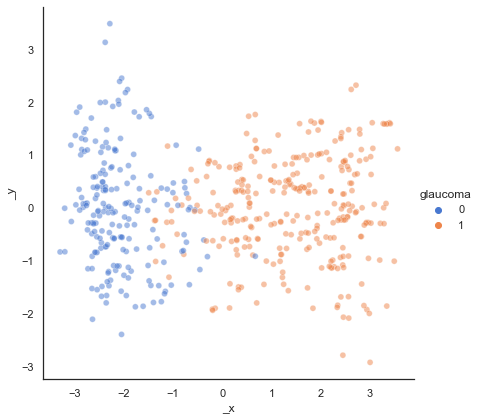

In [28]:
import seaborn as sns
sns.set_theme(style="white")
x=whole_2[:,0]
y=whole_2[:,1]
hue=whole.glaucoma
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x, y,hue,sizes=(40, 400), alpha=.5,  palette="muted",
            height=6, data=whole_2)

plt.show()                     #降维后的全部数据(俩指标)

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


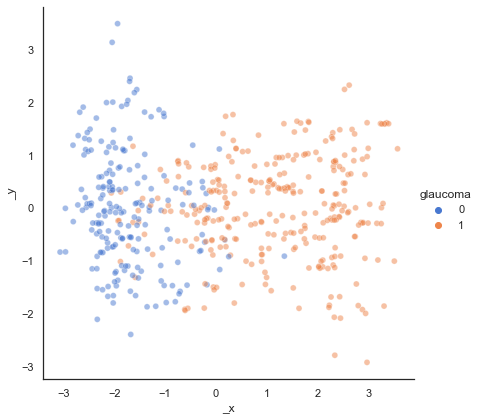

In [29]:
sns.set_theme(style="white")
x=features_2[:,0]
y=features_2[:,1]
hue=whole.glaucoma
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x, y,hue,sizes=(40, 400), alpha=.5,  palette="muted",
            height=6, data=features_2)

plt.show()                     #降维后的feature_(俩指标)

In [30]:
features_2
features_d=pd.DataFrame(features_2)

In [31]:
whole_2
whole_d=pd.DataFrame(whole_2)

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


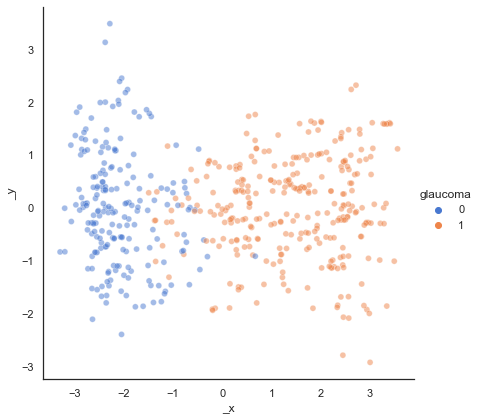

In [32]:
import seaborn as sns
sns.set_theme(style="white")
x=whole__[:,0]
y=whole__[:,1]
hue=whole.glaucoma
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x, y, hue, 
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=whole__)
plt.show()                    #降维后的全部数据

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


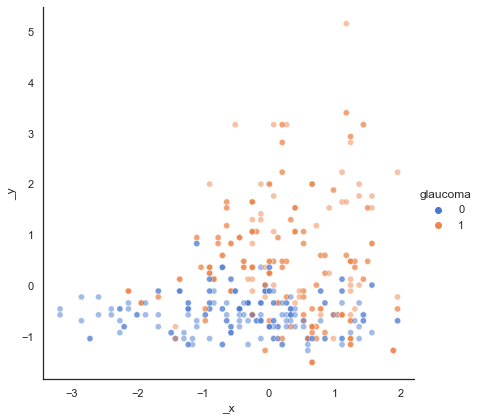

In [33]:
import seaborn as sns
sns.set_theme(style="white")
x=features_[:,0]
y=features_[:,1]
hue=whole.glaucoma
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x, y, hue, 
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=features_)
plt.show()                      #降维后的feature